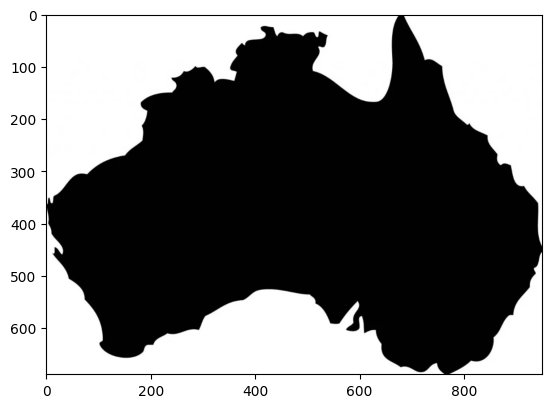

In [208]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cv_image = cv2.imread("..\Australia.png")
plt.imshow(cv_image)
plt.show()

In [209]:
import math
S = cv_image.shape[0] * cv_image.shape[1] / 50
a = round(math.sqrt(S * 2 / (3 * math.sqrt(3))))

import random
epsilon = 0.001

def get_triangle_area(x1, y1, x2, y2, x3, y3) -> float:
    return abs((x1 - x3) * (y2 - y3) + (x2 - x3) * (y3 - y1))


def is_point_in_triangle(x1, y1, x2, y2, x3, y3, x_point, y_point):
    tr_area = get_triangle_area(x1, y1, x2, y2, x3, y3)  # Площадь основного треугольника

    tr_area2 = get_triangle_area(x1, y1, x2, y2, x_point, y_point)  # Площади треугольника, образованного из 2 точек основного
    tr_area3 = get_triangle_area(x1, y1, x_point, y_point, x3, y3)  # и точки, которая проверяется на принадлежность
    tr_area4 = get_triangle_area(x2, y2, x_point, y_point, x3, y3)  # к треугольнику

    # Если площади образованных треугольников равны, то точка в треугольнике
    return abs(tr_area - tr_area2 - tr_area3 - tr_area4) <= epsilon

def is_point_in_hexagon(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x_point, y_point):
  res1 = is_point_in_triangle(x1, y1, x2, y2, x3, y3, x_point, y_point)
  res2 = is_point_in_triangle(x2, y2, x3, y3, x4, y4, x_point, y_point)
  res3 = is_point_in_triangle(x3, y3, x4, y4, x5, y5, x_point, y_point)
  res4 = is_point_in_triangle(x4, y4, x5, y5, x6, y6, x_point, y_point)
  res5 = is_point_in_triangle(x5, y5, x6, y6, x1, y1, x_point, y_point)
  res6 = is_point_in_triangle(x1, y1, x3, y3, x6, y6, x_point, y_point)
  res7 = is_point_in_triangle(x5, y5, x3, y3, x6, y6, x_point, y_point)
  return (res1 or res2 or res3 or res4 or res5 or res6 or res7)

def MonteCarlo(circles, x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, treshold):
  min_x = min(x1, x2, x3, x4, x5, x6)
  max_x = max(x1, x2, x3, x4, x5, x6)
  min_y = min(y1, y2, y3, y4, y5, y6)
  max_y = max(y1, y2, y3, y4, y5, y6)

  if (min_x < 0):
    return False
  if (min_y < 0):
    return False
  if (max_x < 0):
    return False
  if (max_y < 0):
    return False

  if (min_x >= cv_image.shape[0]):
    return False
  if (min_y >= cv_image.shape[1]):
    return False

  if (max_x >= cv_image.shape[0]):
    return False
  if (max_y >= cv_image.shape[1]):
    return False
  cnt = 0

  for i in range(0, circles):
    random.seed(2 * i + 1)
    x = random.randint(min_x, max_x)
    y = random.randint(min_y, max_y)

    if (is_point_in_hexagon(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x, y)):
      if (cv_image[x][y] == np.array([1, 1, 1])).all() == True:
        cnt += 1
  if cnt == 0 :
    return False
  if cnt * 1. / circles >= treshold:
    return True

  return False

In [210]:
from PIL import Image, ImageDraw
import numpy as np
image = Image.open("..\Australia.png")


def draw_hexagonal_grid_on_image(image, rows, cols, size):
    draw = ImageDraw.Draw(image)
    hexagon = np.array([
        [np.cos(np.pi/3 * i) * size, np.sin(np.pi/3 * i) * size]
        for i in range(6)
    ])
    hexagons_coordinates = []
    for row in range(rows):
        for col in range(cols):
            x_offset = 3/2 * size * col
            y_offset = np.sqrt(3) * size * (row + 0.5 * (col % 2))
            hexagon_translated = hexagon + [x_offset, y_offset]
            hexagon_translated = [(int(x), int(y)) for x, y in hexagon_translated]

            if (hexagon_translated[0][0] < 0 or hexagon_translated[0][0] > cv_image.shape[1] or
                hexagon_translated[1][0] < 0 or hexagon_translated[1][0] > cv_image.shape[1] or
                hexagon_translated[2][0] < 0 or hexagon_translated[2][0] > cv_image.shape[1] or
                hexagon_translated[3][0] < 0 or hexagon_translated[3][0] > cv_image.shape[1] or
                hexagon_translated[4][0] < 0 or hexagon_translated[4][0] > cv_image.shape[1] or
                hexagon_translated[5][0] < 0 or hexagon_translated[5][0] > cv_image.shape[1] or

                hexagon_translated[0][1] < 0 or hexagon_translated[0][1] > cv_image.shape[0] or
                hexagon_translated[1][1] < 0 or hexagon_translated[1][1] > cv_image.shape[0] or
                hexagon_translated[2][1] < 0 or hexagon_translated[2][1] > cv_image.shape[0] or
                hexagon_translated[3][1] < 0 or hexagon_translated[3][1] > cv_image.shape[0] or
                hexagon_translated[4][1] < 0 or hexagon_translated[4][1] > cv_image.shape[0] or
                hexagon_translated[5][1] < 0 or hexagon_translated[5][1] > cv_image.shape[0]) :
                continue

            if (MonteCarlo(10000, hexagon_translated[0][1],hexagon_translated[0][0],
                           hexagon_translated[1][1],hexagon_translated[1][0],
                           hexagon_translated[2][1],hexagon_translated[2][0],
                           hexagon_translated[3][1],hexagon_translated[3][0],
                           hexagon_translated[4][1],hexagon_translated[4][0],
                           hexagon_translated[5][1],hexagon_translated[5][0], 0.4)):

                draw.polygon(hexagon_translated, outline="red")
                hexagons_coordinates.append(hexagon_translated)


    return hexagons_coordinates, image

hexagons_coordinates, new_image = draw_hexagonal_grid_on_image(image.copy(), rows=20, cols=20, size=a / 1.2)



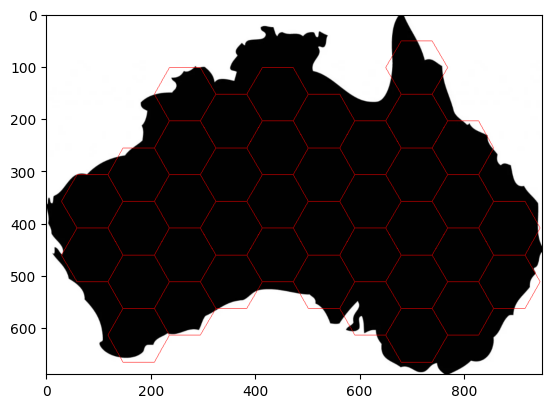

In [211]:
coordinates = []
for i in range(0, len(hexagons_coordinates)):
  new_line = []
  for j in range(0, 6):
    new_line.append((hexagons_coordinates[i][j][0], hexagons_coordinates[i][j][1]))
  coordinates.append(new_line)

new_image.save("output_image.jpg")

plt.imshow(new_image)
plt.show()

In [212]:
from itertools import combinations
coord_to_number = {tuple(coord): i for i, coord in enumerate(coordinates)}

# Функция для определения, есть ли общее ребро между двумя шестиугольниками
def have_common_edge(coord1, coord2):
    common_edges = 0
    for i in range(0, 6):
        if (coord1[i]) in coord2:
            common_edges += 1
    return common_edges

# Создаем массив пар номеров с общими ребрами
common_edge_pairs = []
for pair in combinations(range(len(coordinates)), 2):
    coord1 = coordinates[pair[0]]
    coord2 = coordinates[pair[1]]
    if have_common_edge(coord1, coord2) >=1:
        common_edge_pairs.append(pair)

#print("Массив пар номеров с общими ребрами:")


l = len(common_edge_pairs)
for i in range(0, l):
    common_edge_pairs.append((common_edge_pairs[i][1],common_edge_pairs[i][0]))

#print(common_edge_pairs)

2


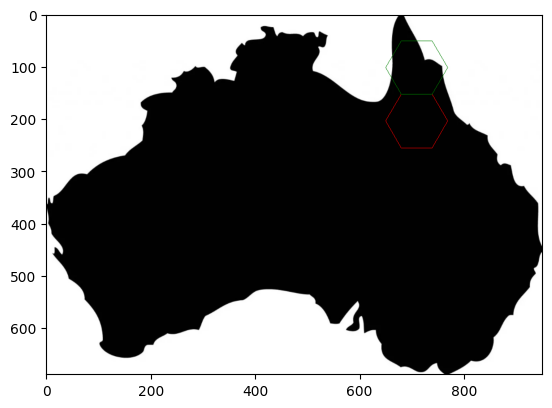

In [213]:

def test(image, ind):
    test_coordinates = []
    test_coordinates.append(coordinates[ind])
    for pair in common_edge_pairs:
        if pair[0] == ind:
            test_coordinates.append(coordinates[pair[1]])
    
    print(len(test_coordinates))

    draw = ImageDraw.Draw(image)
    
    for i in range(1, len(test_coordinates)):
        draw.polygon(test_coordinates[i], outline="red")
    draw.polygon(test_coordinates[0], outline="green")
    return image

new = test(image.copy(), 2)
new.save("test.png")

plt.imshow(new)
plt.show()

In [214]:
adjacency_matrix = [[0 for _ in range( len(coordinates))] for _ in range(len(coordinates))]

for pair in common_edge_pairs:
    adjacency_matrix[pair[0]][pair[1]] = 1
    adjacency_matrix[pair[1]][pair[0]] = 1

for i in range(0, len(coordinates)):
    sum = 0
    for j in range(0, len(coordinates)):
        sum += adjacency_matrix[i][j]

    adjacency_matrix[i][i] = -sum


In [215]:
X_start = []
for coord in coordinates:
    center_x = (coord[0][0] + coord[3][0]) / 2.
    center_y = (coord[0][1] + coord[3][1]) / 2.
    X_start.append([center_x /100, center_y / 100])

In [216]:
alpha0 = 1. #mortality rate due to predators
beta = 1.
delta = 1.
omega = 0.
gamma = 1.
Nt = 1000
tmax = 30
t_array = np.linspace(0.,tmax, Nt)
dt = t_array[1] - t_array[0]

nt = len(t_array)

In [217]:
def MNK_start(X0, i):

    #zero step
    X  = [[0., 0.],[0., 0.],[0., 0.],[0., 0.] ]
    X[0] = X0

    #first step
    k1 = 1 - alpha0 * (1 + np.sin(omega * (i + 1) * dt)) * dt
    k2 = 1 + delta * dt

    c1 = k2 * dt
    c2 = k2 * k1 - beta * dt * X[0][0] - X[0][1] * dt
    c3 = -1. * X[i][1] * k1

    discriminant = c2 ** 2 - 4 * c1 * c3
    X[1][1] = (-1. * c2 + np.sqrt((discriminant))) / (2. * c1)
    X[1][0] = X[0][0] / (k1 + X[1][1] * dt)


    #second step
    a2 = 4/3
    a3 = -1/3
    k1 = 1 - dt * alpha0 * (1 + np.sin(omega * (i + 2) * dt))
    r1 = dt
    s1 = (X[1][0] * a2 + X[0][0] * a3)

    k2 = 1. + delta * dt
    r2 = dt * beta
    s2 = (X[1][1] * a2 + X[0][1] * a3)
    
    c1 = k2 * r1
    c2 = k2 * k1 - r2 * s1 - s2 * r1
    c3 = s2 * k1

    discriminant = c2 ** 2 + 4 * c1 * c3
    
    X[2][1] = (-1. * c2 + np.sqrt(discriminant)) / (2. * c1)
    X[2][0] = s1 / (k1 + r1 * X[2][1])


    #third step

    a2 = 18/11
    a3 = -9/11
    a4 = 2/11

    k1 = 1 - dt * alpha0 * (1 + np.sin(omega * (i + 3) * dt))
    r1 = dt
    s1 = (X[2][0] * a2 + X[1][0] * a3 + X[0][0] * a4)

    k2 = 1. + delta * dt
    r2 = dt * beta
    s2 = (X[2][1] * a2 + X[1][1] * a3 + X[0][1] * a4)
    
    c1 = k2 * r1
    c2 = k2 * k1 - r2 * s1 - s2 * r1
    c3 = s2 * k1

    discriminant = c2 ** 2 + 4 * c1 * c3
    
    X[3][1] = (-1. * c2 + np.sqrt(discriminant)) / (2. * c1)
    X[3][0] = s1 / (k1 + r1 * X[3][1])

    return X

In [218]:
vx = 0.3
vy = 0.1
identity_matrix = np.eye(len(coordinates))

b_matrix1 = identity_matrix - np.array(adjacency_matrix)* dt * vx
inverse_matrix1 = np.linalg.inv(np.array(b_matrix1))
b_matrix2 = identity_matrix - np.array(adjacency_matrix)* dt * vy
inverse_matrix2 = np.linalg.inv(np.array(b_matrix2))

In [219]:
X_vec = []
X_vec.append(X_start)


    
first_step = []
current_layer = X_vec[0]

for pair in current_layer:
    res1 = MNK_start(pair, 0)
    first_step.append((res1))

X_vec = first_step


def MNK(X):
    a2 = 18/11
    a3 = -9/11
    a4 = 2/11
    i = len(X) - 3
    X.append([0., 0.])
    k1 = 1 - dt * alpha0 * (1 + np.sin(omega * (i + 3) * dt))
    r1 = dt
    s1 = (X[i + 2][0] * a2 + X[i + 1][0] * a3 + X[i][0] * a4)

    k2 = 1. + delta * dt
    r2 = dt * beta
    s2 = (X[i + 2][1] * a2 + X[i + 1][1] * a3 + X[i][1] * a4)
    
    c1 = k2 * r1
    c2 = k2 * k1 - r2 * s1 - s2 * r1
    c3 = s2 * k1

    discriminant = c2 ** 2 + 4 * c1 * c3
    
    X[i + 3][1] = (-1. * c2 + np.sqrt(discriminant)) / (2. * c1)
    X[i + 3][0] = s1 / (k1 + r1 * X[i + 3][1])
    return X[i+3]


for i in range(4, Nt):
    layer = []
    n = len(X_vec[2])
    if i % 5 != 0:
        for j in range(0, len(coordinates)):
            
            res = MNK([X_vec[j][n - 3], X_vec[j][n - 2], X_vec[j][n - 1]])
            X_vec[j] = list(X_vec[j])
            X_vec[j].append([res[0], res[1]])
    else:
        alpha1 = 18/11
        alpha2 = -9/11
        alpha3 = 2/11
        rightX = []
        rightY = []
        for j in range(0, len(coordinates)):
            rightX.append(alpha3 * X_vec[j][n - 3][0] + alpha2 * X_vec[j][n - 2][0] + alpha1 * X_vec[j][n - 1][0])
            rightY.append(alpha3 * X_vec[j][n - 3][1] + alpha2 * X_vec[j][n - 2][1] + alpha1 * X_vec[j][n - 1][1])

        resX = rightX @ inverse_matrix1
        resY = rightY @ inverse_matrix2

        for j in range(0, len(coordinates)):
            X_vec[j] = list(X_vec[j])
            X_vec[j].append([resX[j], resY[j]])


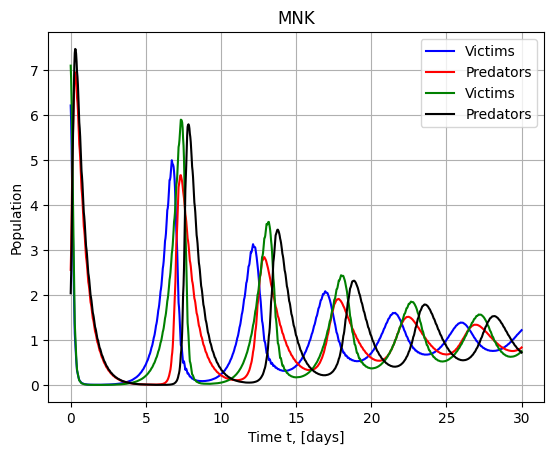

In [220]:
import matplotlib.pyplot as plt

t_array = np.linspace(0.,tmax, Nt)
list_x = []
list_y = []
for pair in X_vec[7]:
    list_x.append(pair[0])
    list_y.append(pair[1])

list_x6 = []
list_y6 = []
for pair in X_vec[8]:
    list_x6.append(pair[0])
    list_y6.append(pair[1])
    
plt.figure()
plt.grid()
plt.title("MNK")
plt.plot(t_array, list_x, 'b', label = 'Victims')
plt.plot(t_array, list_y, 'r', label = "Predators")
plt.plot(t_array, list_x6, 'g', label = 'Victims')
plt.plot(t_array, list_y6, 'black', label = "Predators")


plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

In [221]:
# Число обсловленности
eigenvalues1 = np.linalg.eig(b_matrix1)[0]
norma1 = eigenvalues1.max()
eigenvalues2 = np.linalg.eig(inverse_matrix1)[0]
norma2 = eigenvalues2.max()
mu1 = norma1 * norma2
mu1

1.07558304297582

In [222]:
eigenvalues3 = np.linalg.eig(b_matrix2)[0]
norma3 = eigenvalues3.max()
eigenvalues4 = np.linalg.eig(inverse_matrix2)[0]
norma4 = eigenvalues4.max()
mu2 = norma3 * norma4
mu2

1.0251943476586098

In [231]:
for pair in X_start:
    pair[0] = pair[0] * 1.01
    pair[1] = pair[1] * 0.99


In [232]:
X_vec = []
X_vec.append(X_start)


    
first_step = []
current_layer = X_vec[0]

for pair in current_layer:
    res1 = MNK_start(pair, 0)
    first_step.append((res1))

X_vec = first_step


def MNK(X):
    a2 = 18/11
    a3 = -9/11
    a4 = 2/11
    i = len(X) - 3
    X.append([0., 0.])
    k1 = 1 - dt * alpha0 * (1 + np.sin(omega * (i + 3) * dt))
    r1 = dt
    s1 = (X[i + 2][0] * a2 + X[i + 1][0] * a3 + X[i][0] * a4)

    k2 = 1. + delta * dt
    r2 = dt * beta
    s2 = (X[i + 2][1] * a2 + X[i + 1][1] * a3 + X[i][1] * a4)
    
    c1 = k2 * r1
    c2 = k2 * k1 - r2 * s1 - s2 * r1
    c3 = s2 * k1

    discriminant = c2 ** 2 + 4 * c1 * c3
    
    X[i + 3][1] = (-1. * c2 + np.sqrt(discriminant)) / (2. * c1)
    X[i + 3][0] = s1 / (k1 + r1 * X[i + 3][1])
    return X[i+3]


for i in range(4, Nt):
    layer = []
    n = len(X_vec[2])
    if i % 5 != 0:
        for j in range(0, len(coordinates)):
            
            res = MNK([X_vec[j][n - 3], X_vec[j][n - 2], X_vec[j][n - 1]])
            X_vec[j] = list(X_vec[j])
            X_vec[j].append([res[0], res[1]])
    else:
        alpha1 = 18/11
        alpha2 = -9/11
        alpha3 = 2/11
        rightX = []
        rightY = []
        for j in range(0, len(coordinates)):
            rightX.append(alpha3 * X_vec[j][n - 3][0] + alpha2 * X_vec[j][n - 2][0] + alpha1 * X_vec[j][n - 1][0])
            rightY.append(alpha3 * X_vec[j][n - 3][1] + alpha2 * X_vec[j][n - 2][1] + alpha1 * X_vec[j][n - 1][1])

        resX = rightX @ inverse_matrix1
        resY = rightY @ inverse_matrix2

        for j in range(0, len(coordinates)):
            X_vec[j] = list(X_vec[j])
            X_vec[j].append([resX[j], resY[j]])


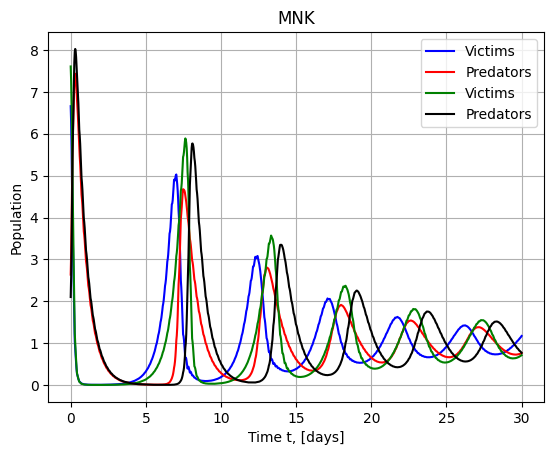

In [233]:
import matplotlib.pyplot as plt

t_array = np.linspace(0.,tmax, Nt)


list_x6 = []
list_y6 = []
for pair in X_vec[7]:
    list_x6.append(pair[0])
    list_y6.append(pair[1])
    
plt.figure()
plt.grid()
plt.title("MNK")
plt.plot(t_array, list_x, 'b', label = 'Victims')
plt.plot(t_array, list_y, 'r', label = "Predators")
plt.plot(t_array, list_x6, 'g', label = 'Victims')
plt.plot(t_array, list_y6, 'black', label = "Predators")


plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()